<a href="https://colab.research.google.com/github/DinurakshanRavichandran/Bank-Subscription-Prediction-Model/blob/main/BankSubscriptionPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding the data

In [1]:
import pandas as pd

#Load the dataset
file_path = "/content/bank-additional-full.csv"
df = pd.read_csv(file_path, sep=';')

#Display the first few rows of the dataset
print(df.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

Get basic information about the dataset

In [ ]:
#Datset information
print("Dataset Information:")
print(df.info())

#Check for null values : expected - 0
print("Null Values:")
print(df.isnull().sum())

#Check for duplicate values : expected - 0
print("Duplicate Values:")
print(df.duplicated().sum())

#Summary statistics for numerical values
print("Summary Statistics:")
print(df.describe())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.

Check class distribution

Target Variable Distribution:
y
no     36548
yes     4640
Name: count, dtype: int64


<ipython-input-4-a3ce78c6ba98>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='y', data=df, palette="pastel")


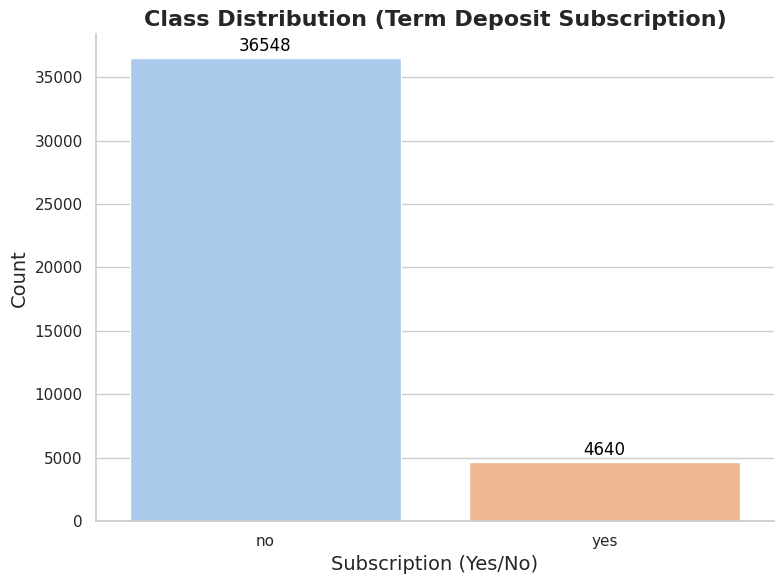

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Target Variable Distribution:")
print(df['y'].value_counts())

# Plot the class distribution
# Set Seaborn style
sns.set_theme(style="whitegrid")

# Calculate the value counts
value_counts = df['y'].value_counts()

# Create the plot
plt.figure(figsize=(8, 6))  # Adjust the figure size
ax = sns.countplot(x='y', data=df, palette="pastel")

# Add title and labels
plt.title("Class Distribution (Term Deposit Subscription)", fontsize=16, fontweight="bold")
plt.xlabel("Subscription (Yes/No)", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Annotate each bar with the count
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Remove the top and right spines for a cleaner look
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()

Explore categorical and numerical features

Categorical Columns and Unique Values:
job: 12 unique values
marital: 4 unique values
education: 8 unique values
default: 3 unique values
housing: 3 unique values
loan: 3 unique values
contact: 2 unique values
month: 10 unique values
day_of_week: 5 unique values
poutcome: 3 unique values
y: 2 unique values


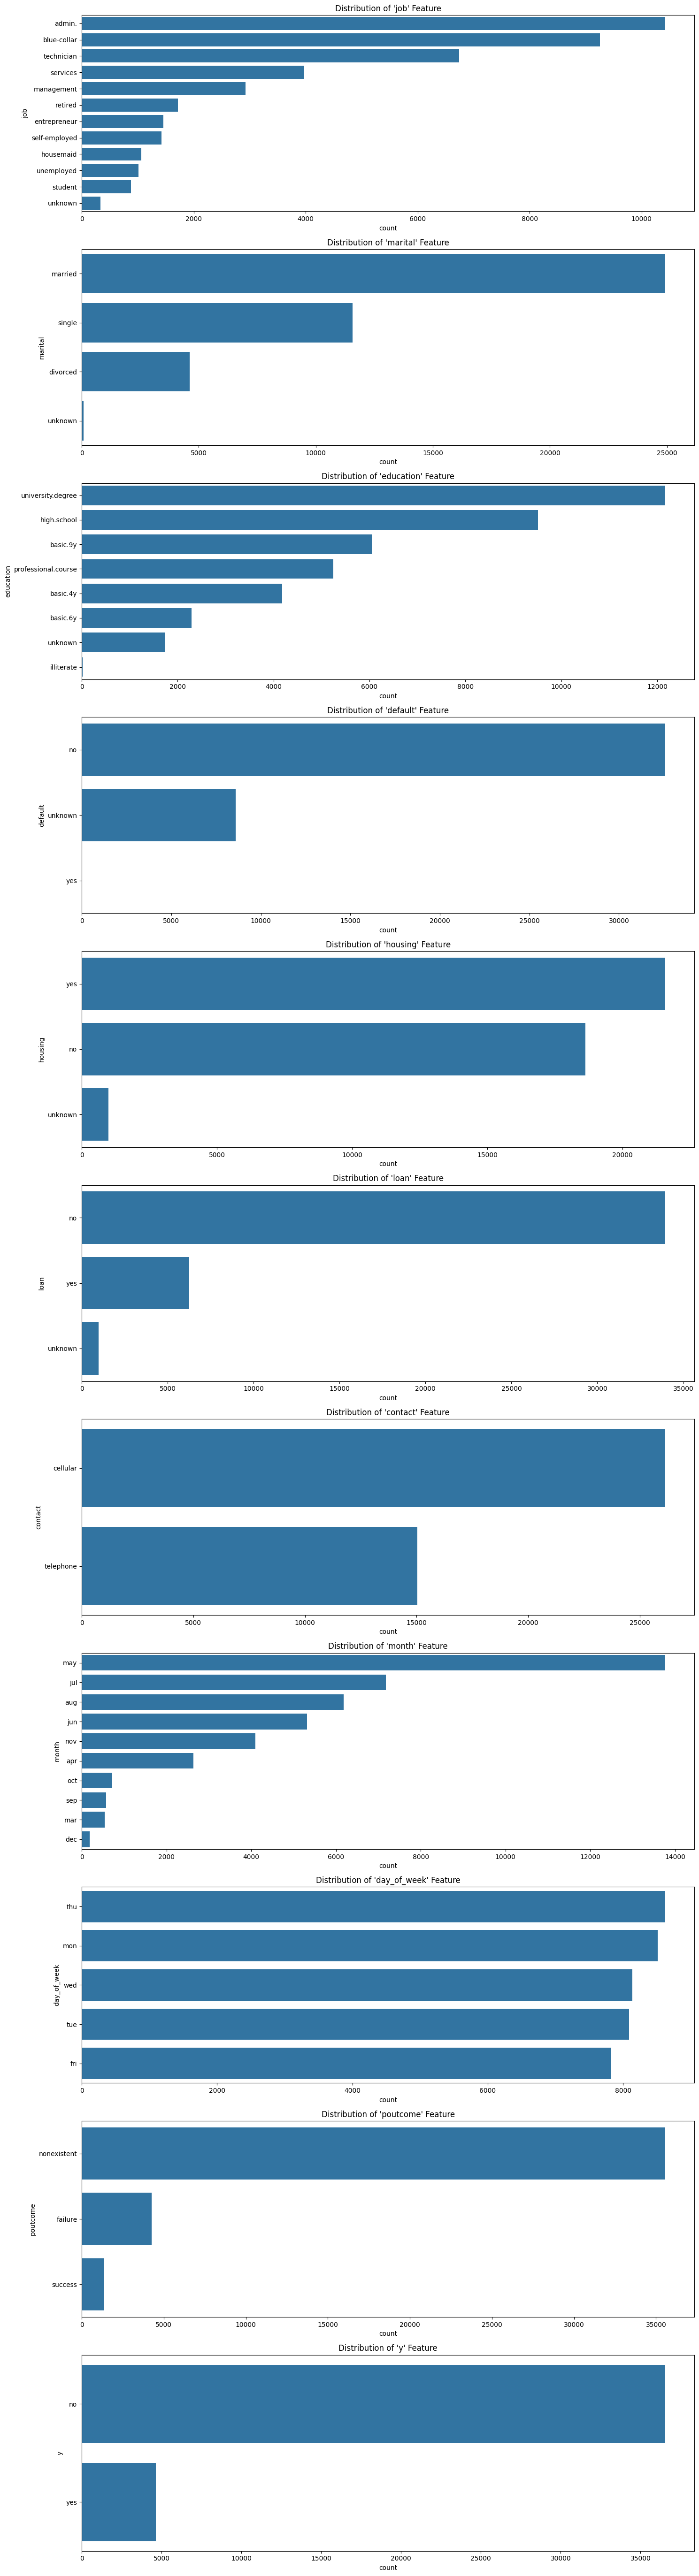

Numerical Columns Statistics:
               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960     

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Separate categorical and numerical features
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(exclude=['object']).columns

# Print unique values in categorical columns
print("Categorical Columns and Unique Values:")
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")

# Plot distributions for all categorical columns
plt.figure(figsize=(15, 5 * len(categorical_cols)))  # Dynamically adjust the height
for i, category in enumerate(categorical_cols, start=1):
    plt.subplot(len(categorical_cols), 1, i)
    sns.countplot(y=category, data=df, order=df[category].value_counts().index)
    plt.title(f"Distribution of '{category}' Feature")

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()

# Summary statistics for numerical columns
print("Numerical Columns Statistics:")
print(df[numerical_cols].describe())


Check feature correlation

Correlation Matrix for Numerical Features:


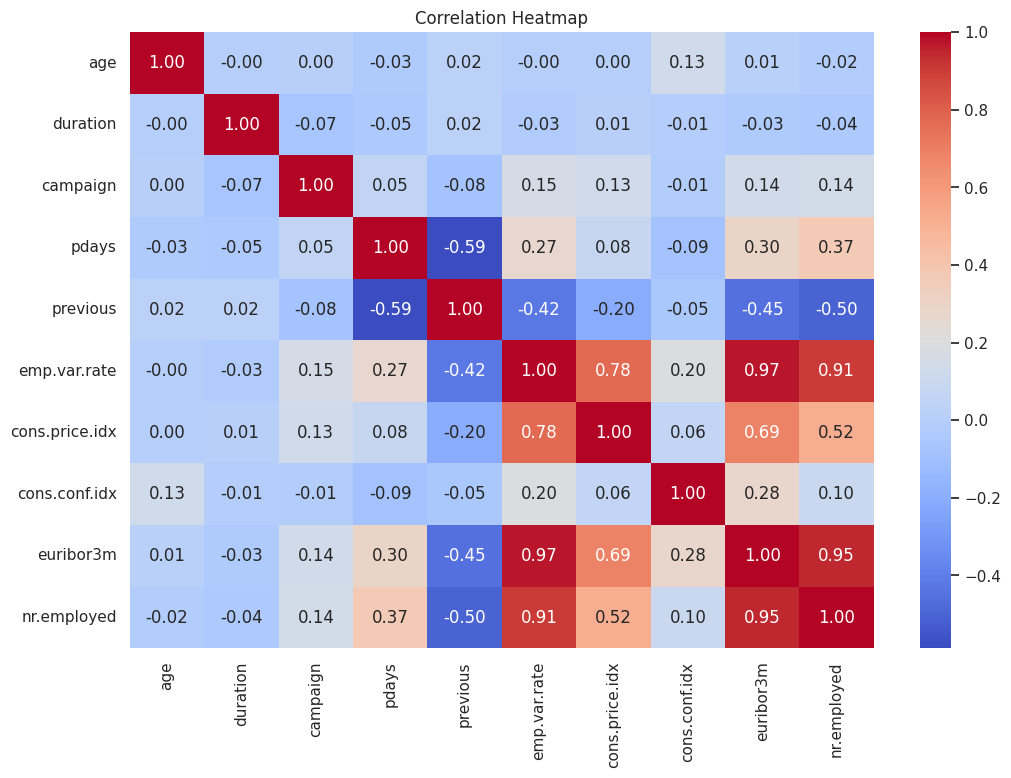

In [ ]:
# Correlation matrix
print("Correlation Matrix for Numerical Features:")
correlation_matrix = df[numerical_cols].corr()

# Plot a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Explore data imbalances and insights

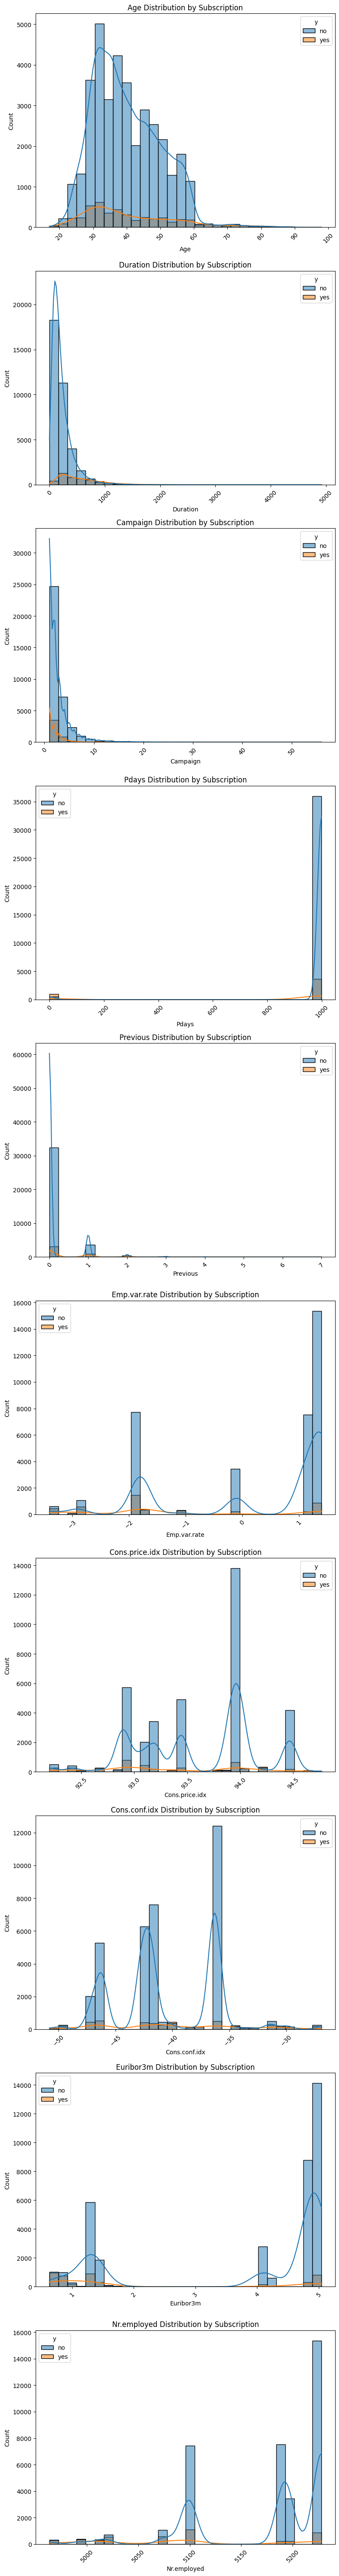

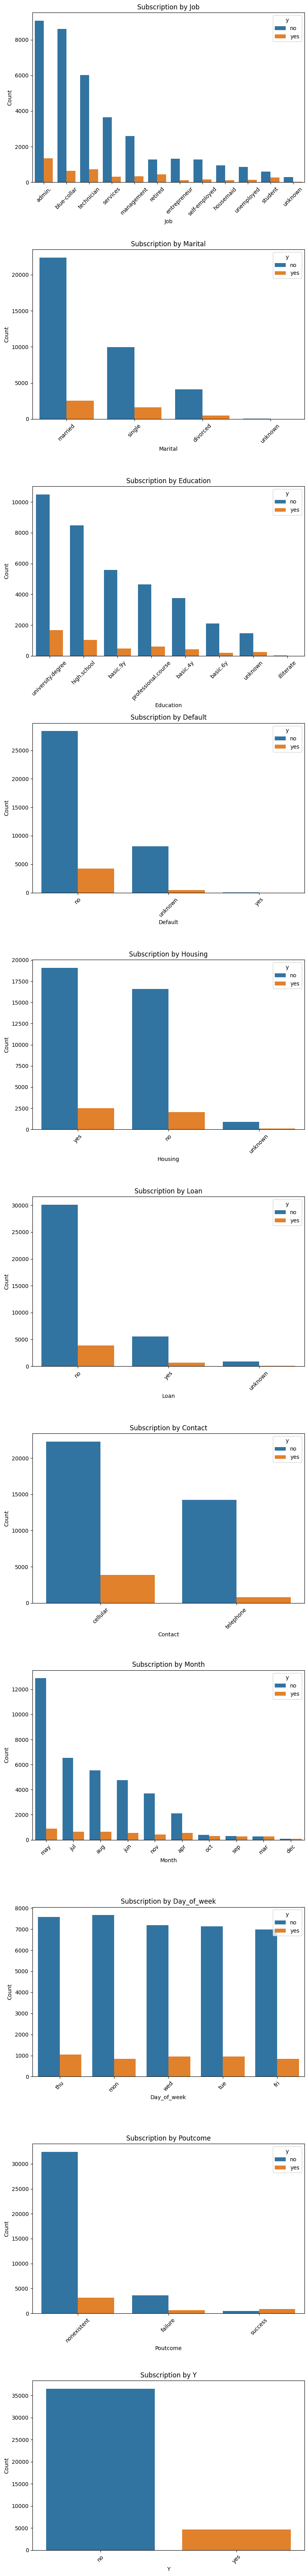

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define features to analyze
numerical_features = df.select_dtypes(exclude=['object']).columns  # Numerical features
categorical_features = df.select_dtypes(include=['object']).columns  # Categorical features

# Plot relationships for numerical features
plt.figure(figsize=(8, 6 * len(numerical_features)))  # Dynamic figure size for numerical features
for i, feature in enumerate(numerical_features, start=1):
    plt.subplot(len(numerical_features), 1, i)
    sns.histplot(data=df, x=feature, hue='y', kde=True, bins=30)
    plt.title(f"{feature.capitalize()} Distribution by Subscription")
    plt.xlabel(feature.capitalize())
    plt.ylabel("Count")
    plt.xticks(rotation=45)  # Rotate x-axis labels

plt.tight_layout()
plt.show()

# Plot relationships for categorical features
plt.figure(figsize=(8, 6 * len(categorical_features)))  # Dynamic figure size for categorical features
for i, feature in enumerate(categorical_features, start=1):
    plt.subplot(len(categorical_features), 1, i)
    sns.countplot(x=feature, hue='y', data=df, order=df[feature].value_counts().index)
    plt.title(f"Subscription by {feature.capitalize()}")
    plt.xlabel(feature.capitalize())
    plt.ylabel("Count")
    plt.xticks(rotation=45)  # Rotate x-axis labels

plt.tight_layout()
plt.show()


# Preprocessing and Data pipeline

### Method one - Apply pre-processing after splitting

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline as ImbPipeline  # For SMOTE in the pipeline
from imblearn.over_sampling import SMOTE
import pandas as pd

# Load the dataset
file_path = "/content/bank-additional-full.csv"
df = pd.read_csv(file_path, sep=';')

# Step 1: Clean the dataset
print("Initial Shape:", df.shape)

# Drop duplicate rows
df = df.drop_duplicates()
print("Shape After Removing Duplicates:", df.shape)

# Step 2: Encode the target variable
label_encoder = LabelEncoder()
df['y'] = label_encoder.fit_transform(df['y'])  # 'no' -> 0, 'yes' -> 1

# Step 3: Replace -1 in 'pdays' with a separate category
df['pdays'] = df['pdays'].replace(-1, 9999)  # '9999' as a placeholder for 'no_previous_contact'

# Step 4: Split into features (X) and target (y)
X = df.drop(['y', 'duration'], axis=1)  # Drop the 'duration' column here
y = df['y']

# Step 5: Identify categorical and numerical features
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Step 6: Preprocessing for categorical and numerical data
# Numerical preprocessing (e.g., scaling, imputation)
numerical_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Categorical preprocessing (e.g., encoding, imputation)
categorical_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessors into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_preprocessor, numerical_cols),
        ('cat', categorical_preprocessor, categorical_cols)
    ]
)

# Step 7: Create the complete pipeline
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('smote', SMOTE(random_state=42))  # Apply SMOTE for oversampling
])



# Step 8: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 9: Fit the pipeline on the training data and transform
X_train_processed, y_train_processed = pipeline.fit_resample(X_train, y_train)

# Transform the test data (No SMOTE applied here)
X_test_processed = pipeline.named_steps['preprocessor'].transform(X_test)

# Print the final shapes of the datasets
print("Shape of Processed Training Data:", X_train_processed.shape)
print("Shape of Processed Testing Data:", X_test_processed.shape)

Initial Shape: (41188, 21)
Shape After Removing Duplicates: (41176, 21)
Shape of Processed Training Data: (51152, 62)
Shape of Processed Testing Data: (12353, 62)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [ ]:
# Inspect the transformed training data (converted to array)
print("Sample Processed Data (First 5 Rows):")
print(X_train_processed[:5])

Sample Processed Data (First 5 Rows):
[[-1.58124359 -0.56596326  0.19544346 -0.34955143 -2.21656523 -1.97763768
   2.93937773 -1.66816585 -2.06967284  0.          0.          0.
   0.          0.          0.          0.          0.21219726  0.78780274
   0.          0.          0.          0.          0.          1.
   0.          0.          0.          0.          1.          0.
   0.          0.          0.          1.          0.          0.
   1.          0.          0.          1.          0.          0.
   1.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          1.          0.
   0.          0.          0.          1.          0.          0.
   1.          0.        ]
 [-0.57806914  0.1559842  -5.10586925  5.71156437 -1.19801718  0.51876907
   0.10866133 -1.68719243 -2.19147133  1.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          1.

### Method 2 - Apply pre-processing before splitting

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import pandas as pd

# Load the dataset
file_path = "/content/bank-additional-full.csv"
df = pd.read_csv(file_path, sep=';')

# Step 1: Clean the dataset
print("Initial Shape:", df.shape)

# Drop duplicate rows
df = df.drop_duplicates()
print("Shape After Removing Duplicates:", df.shape)

# Step 2: Encode the target variable
label_encoder = LabelEncoder()
df['y'] = label_encoder.fit_transform(df['y'])  # 'no' -> 0, 'yes' -> 1

# Step 3: Replace -1 in 'pdays' with a separate category
df['pdays'] = df['pdays'].replace(-1, 9999)  # '9999' as a placeholder for 'no_previous_contact'

# Step 4: Split into features (X) and target (y)
X = df.drop(['y', 'duration'], axis=1)  # Drop the 'duration' column here
y = df['y']

# Step 5: Identify categorical and numerical features
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Step 6: Preprocessing for categorical and numerical data
# Numerical preprocessing (e.g., scaling, imputation)
numerical_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Categorical preprocessing (e.g., encoding, imputation)
categorical_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessors into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_preprocessor, numerical_cols),
        ('cat', categorical_preprocessor, categorical_cols)
    ]
)

# Step 7: Preprocess the entire dataset
X_processed = preprocessor.fit_transform(X)

# Step 8: Apply SMOTE before splitting
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_processed, y)

# Step 9: Split the resampled data into training and testing sets
X_train_processed, X_test_processed, y_train_processed, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled
)

# Print the final shapes of the datasets
print("Shape of Processed Training Data:", X_train_processed.shape)
print("Shape of Processed Testing Data:", X_test_processed.shape)


Initial Shape: (41188, 21)
Shape After Removing Duplicates: (41176, 21)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Shape of Processed Training Data: (51151, 62)
Shape of Processed Testing Data: (21923, 62)


In [ ]:
# Inspect the transformed training data (converted to array)
print("Sample Processed Data (First 5 Rows):")
print(X_train_processed[:5])


Sample Processed Data (First 5 Rows):
[[-1.58124359 -0.56596326  0.19544346 -0.34955143 -2.21656523 -1.97763768
   2.93937773 -1.66816585 -2.06967284  0.          0.          0.
   0.          0.          0.          0.          0.21219726  0.78780274
   0.          0.          0.          0.          0.          1.
   0.          0.          0.          0.          1.          0.
   0.          0.          0.          1.          0.          0.
   1.          0.          0.          1.          0.          0.
   1.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          1.          0.
   0.          0.          0.          1.          0.          0.
   1.          0.        ]
 [-0.57806914  0.1559842  -5.10586925  5.71156437 -1.19801718  0.51876907
   0.10866133 -1.68719243 -2.19147133  1.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          1.

### Apply PCA

Number of Components Selected: 25
Explained Variance Ratio for Each Component: [0.33730152 0.14163112 0.08679982 0.06920431 0.04070065 0.03748073
 0.0351631  0.02501536 0.02216402 0.0162175  0.01596501 0.01290266
 0.01265336 0.01231557 0.01077395 0.01026427 0.00986132 0.00979902
 0.00945228 0.00930988 0.00706056 0.00658306 0.00604688 0.00515256
 0.00502603]
Total Explained Variance: 0.95


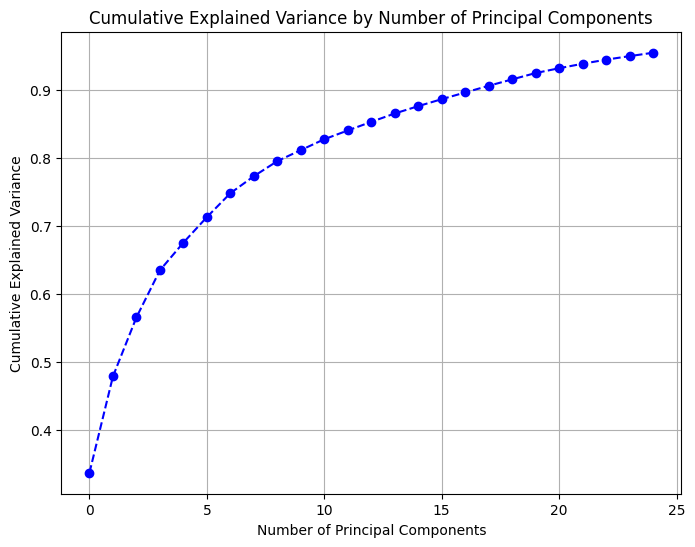

Shape of Training Data after PCA: (51151, 25)
Shape of Testing Data after PCA: (21923, 25)


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Apply PCA to the preprocessed and SMOTE-applied training data
# Initialize PCA - Start with retaining 95% of the variance
pca = PCA(n_components=0.95, random_state=42)  # Retains 95% of the variance
X_train_pca = pca.fit_transform(X_train_processed)  # Apply PCA to training data
X_test_pca = pca.transform(X_test_processed)       # Apply PCA to testing data (transformed, no SMOTE here)

# Step 2: Check the number of components chosen
print(f"Number of Components Selected: {pca.n_components_}")
print(f"Explained Variance Ratio for Each Component: {pca.explained_variance_ratio_}")
print(f"Total Explained Variance: {sum(pca.explained_variance_ratio_):.2f}")

# Step 3: Plot the explained variance ratio (Optional)
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Step 4: Inspect the transformed data
print(f"Shape of Training Data after PCA: {X_train_pca.shape}")
print(f"Shape of Testing Data after PCA: {X_test_pca.shape}")


# Model Training and evaluation

## Model Training with PCA

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
#
# Scale the output labels for neural networks if necessary


In [ ]:

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the PCA-reduced training data
rf_model.fit(X_train_pca, y_train_processed)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test data
rf_predictions = rf_model.predict(X_test_pca)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

print("\nClassification Report for Random Forest:")
print(classification_report(y_test, rf_predictions))

print("\nConfusion Matrix for Random Forest:")
print(confusion_matrix(y_test, rf_predictions))


Random Forest Accuracy: 0.9144

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91     10962
           1       0.91      0.92      0.92     10961

    accuracy                           0.91     21923
   macro avg       0.91      0.91      0.91     21923
weighted avg       0.91      0.91      0.91     21923


Confusion Matrix for Random Forest:
[[ 9932  1030]
 [  847 10114]]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Scale the PCA data (Neural Networks benefit from scaled inputs)
scaler = StandardScaler()
X_train_pca_scaled = scaler.fit_transform(X_train_pca)  # Scale the PCA-reduced training data
X_test_pca_scaled = scaler.transform(X_test_pca)       # Scale the PCA-reduced testing data

# Step 2: Build the Neural Network model
nn_model = Sequential([
    Dense(64, input_dim=X_train_pca_scaled.shape[1], activation='relu'),  # Input layer with 64 neurons
    Dense(32, activation='relu'),  # Hidden layer with 32 neurons
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Step 3: Compile the model
nn_model.compile(optimizer=Adam(learning_rate=0.001),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

# Step 4: Train the model
history = nn_model.fit(
    X_train_pca_scaled, y_train_processed,
    epochs=20,
    batch_size=32,
    validation_data=(X_test_pca_scaled, y_test),
    verbose=1
)

# Step 5: Evaluate the model on the test data
nn_loss, nn_accuracy = nn_model.evaluate(X_test_pca_scaled, y_test)
print(f"\nNeural Network Accuracy: {nn_accuracy:.4f}")

# Step 6: Make predictions on the test data
nn_predictions = (nn_model.predict(X_test_pca_scaled) > 0.5).astype(int)

# Step 7: Evaluate predictions
print("\nClassification Report for Neural Network:")
print(classification_report(y_test, nn_predictions))

print("\nConfusion Matrix for Neural Network:")
print(confusion_matrix(y_test, nn_predictions))


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1599/1599 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7157 - loss: 0.5526 - val_accuracy: 0.7510 - val_loss: 0.5078
Epoch 2/20
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7598 - loss: 0.4960 - val_accuracy: 0.7688 - val_loss: 0.4851
Epoch 3/20
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7737 - loss: 0.4725 - val_accuracy: 0.7824 - val_loss: 0.4610
Epoch 4/20
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7968 - loss: 0.4400 - val_accuracy: 0.7953 - val_loss: 0.4428
Epoch 5/20
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8098 - loss: 0.4182 - val_accuracy: 0.8056 - val_loss: 0.4274
Epoch 6/20
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8193 - loss: 0.3998 - val_accuracy: 0.8149 - val_loss: 0.4134
Epoch 7/20
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8270 - loss: 0.3872 - val_accuracy: 0.8203 - val_loss: 0.4063
Epoch 8/20
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8379 - loss: 0.3729 - val_accurac

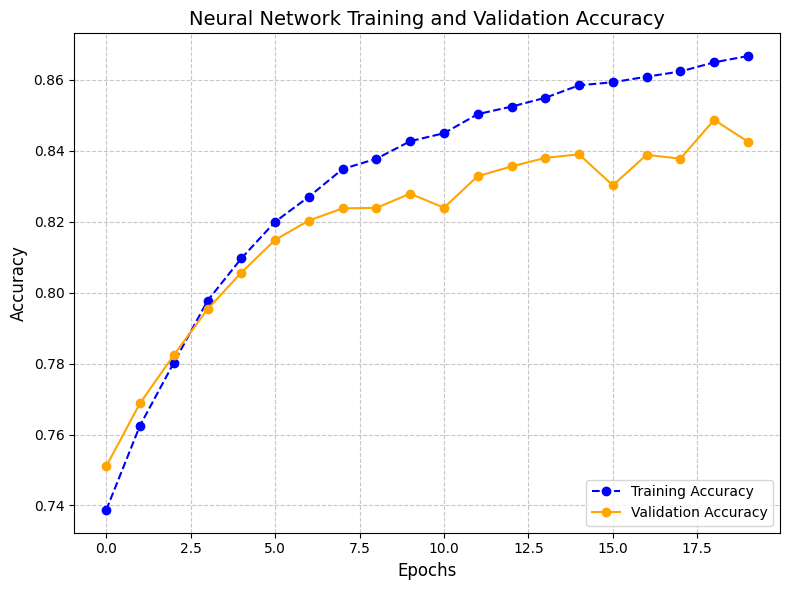

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o', linestyle='--', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o', linestyle='-', color='orange')
plt.title('Neural Network Training and Validation Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Plot ROC curve

686/686 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


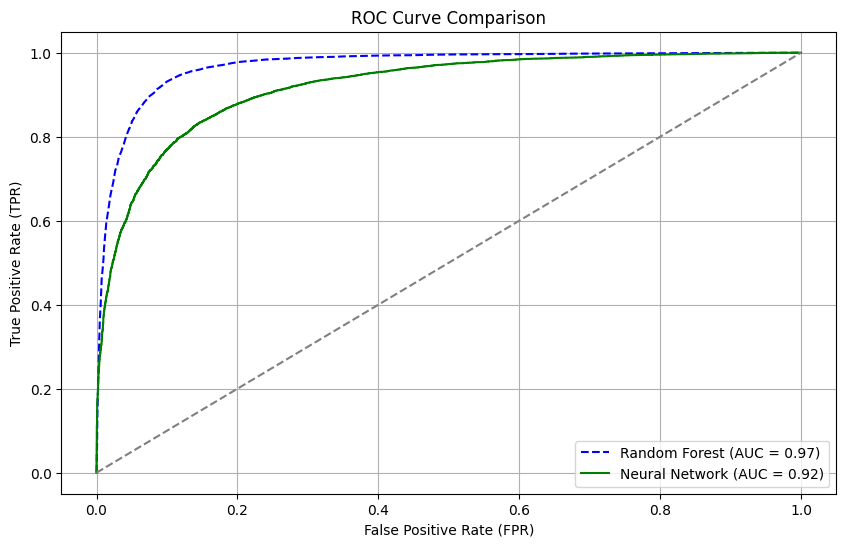

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Step 1: Compute predicted probabilities
rf_probabilities = rf_model.predict_proba(X_test_pca)[:, 1]  # Random Forest probabilities for class 1
# Use X_test_pca_scaled instead of X_test_scaled
nn_probabilities = nn_model.predict(X_test_pca_scaled).ravel()  # Neural Network probabilities

# Step 2: Calculate ROC curves
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probabilities) # Use y_test instead of y_test_processed
nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_probabilities) # Use y_test instead of y_test_processed


# Step 3: Compute AUC scores
rf_auc = roc_auc_score(y_test, rf_probabilities) # Use y_test instead of y_test_processed
nn_auc = roc_auc_score(y_test, nn_probabilities) # Use y_test instead of y_test_processed

# Step 4: Plot the ROC curve
plt.figure(figsize=(10, 6))

# Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})', linestyle='--', color='blue')

# Neural Network ROC
plt.plot(nn_fpr, nn_tpr, label=f'Neural Network (AUC = {nn_auc:.2f})', linestyle='-', color='green')

# Diagonal line (random guess)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Labels, legend, and title
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)

plt.show()

## Model Training without PCA

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

# Scale the output labels for neural networks if necessary


In [ ]:

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the PCA-reduced training data
rf_model.fit(X_train_processed, y_train_processed)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test data
rf_predictions = rf_model.predict(X_test_processed)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

print("\nClassification Report for Random Forest:")
print(classification_report(y_test, rf_predictions))

print("\nConfusion Matrix for Random Forest:")
print(confusion_matrix(y_test, rf_predictions))


Random Forest Accuracy: 0.9418

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     10962
           1       0.95      0.93      0.94     10961

    accuracy                           0.94     21923
   macro avg       0.94      0.94      0.94     21923
weighted avg       0.94      0.94      0.94     21923


Confusion Matrix for Random Forest:
[[10401   561]
 [  716 10245]]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Scale the processed data
scaler = StandardScaler()
X_train_processed_scaled = scaler.fit_transform(X_train_processed)  # Scale the processed training data
X_test_processed_scaled = scaler.transform(X_test_processed)       # Scale the processed testing data

# Step 2: Build the Neural Network model
nn_model = Sequential([
    Dense(64, input_dim=X_train_processed_scaled.shape[1], activation='relu'),  # Input layer with 64 neurons
    Dense(32, activation='relu'),  # Hidden layer with 32 neurons
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Step 3: Compile the model
nn_model.compile(optimizer=Adam(learning_rate=0.001),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

# Step 4: Train the model
history = nn_model.fit(
    X_train_processed_scaled, y_train_processed,
    epochs=20,
    batch_size=32,
    validation_data=(X_test_processed_scaled, y_test),
    verbose=1
)

# Step 5: Evaluate the model on the test data
nn_loss, nn_accuracy = nn_model.evaluate(X_test_processed_scaled, y_test)
print(f"\nNeural Network Accuracy: {nn_accuracy:.4f}")

# Step 6: Make predictions on the test data
nn_predictions = (nn_model.predict(X_test_processed_scaled) > 0.5).astype(int)

# Step 7: Evaluate predictions
print("\nClassification Report for Neural Network:")
print(classification_report(y_test, nn_predictions))

print("\nConfusion Matrix for Neural Network:")
print(confusion_matrix(y_test, nn_predictions))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7280 - loss: 0.5384 - val_accuracy: 0.7688 - val_loss: 0.4847
Epoch 2/20
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7765 - loss: 0.4709 - val_accuracy: 0.7847 - val_loss: 0.4534
Epoch 3/20
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8016 - loss: 0.4322 - val_accuracy: 0.8088 - val_loss: 0.4254
Epoch 4/20
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8203 - loss: 0.4009 - val_accuracy: 0.8134 - val_loss: 0.4096
Epoch 5/20
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8340 - loss: 0.3754 - val_accuracy: 0.8242 - val_loss: 0.3907
Epoch 6/20
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8455 - loss: 0.3523 - val_accuracy: 0.8344 - val_loss: 0.3832
Epoch 7/20
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8579 - loss: 0.3291 - val_accuracy: 0.8335 - val_loss: 0.3791
Epoch 8/20
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8678 - loss: 0.3189 - 

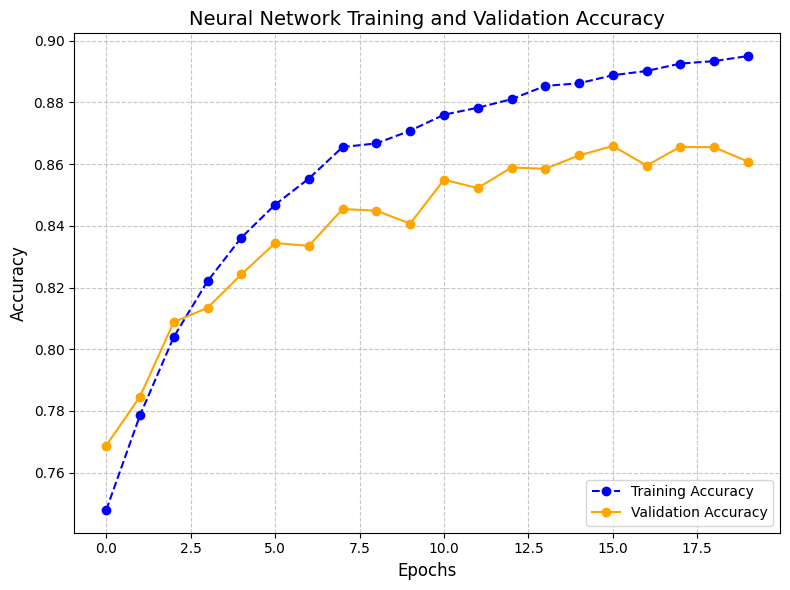

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o', linestyle='--', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o', linestyle='-', color='orange')
plt.title('Neural Network Training and Validation Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


686/686 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


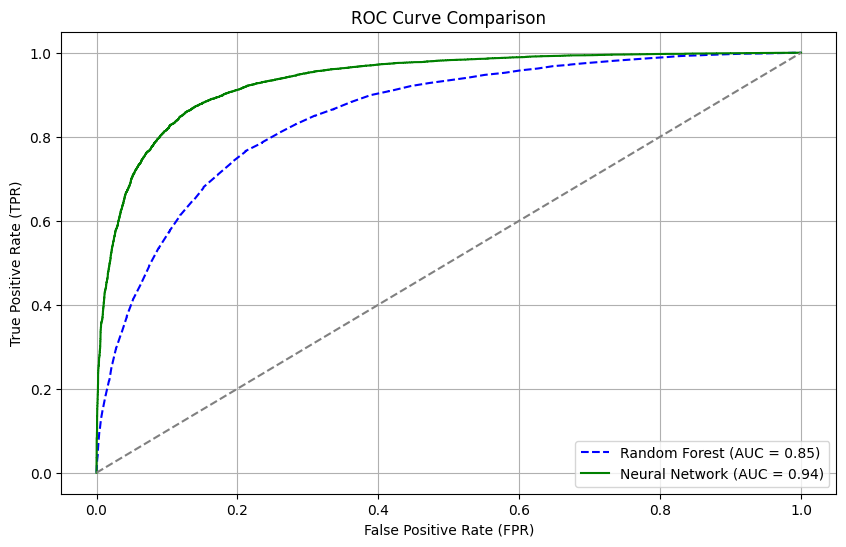

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Step 1: Compute predicted probabilities
rf_probabilities = rf_model.predict_proba(X_test_processed_scaled)[:, 1]  # Random Forest probabilities for class 1
nn_probabilities = nn_model.predict(X_test_processed_scaled).ravel()     # Neural Network probabilities

# Step 2: Calculate ROC curves
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probabilities)  # Use y_test from your split
nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_probabilities)  # Use y_test from your split

# Step 3: Compute AUC scores
rf_auc = roc_auc_score(y_test, rf_probabilities)  # AUC for Random Forest
nn_auc = roc_auc_score(y_test, nn_probabilities)  # AUC for Neural Network

# Step 4: Plot the ROC curve
plt.figure(figsize=(10, 6))

# Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})', linestyle='--', color='blue')

# Neural Network ROC
plt.plot(nn_fpr, nn_tpr, label=f'Neural Network (AUC = {nn_auc:.2f})', linestyle='-', color='green')

# Diagonal line (random guess)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Labels, legend, and title
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)

plt.show()
